In [125]:
from numpy import *
import matplotlib.pyplot as plt

def mass_in_sphere(rho, r, dr):
    return 4 * pi * sum(rho * r**2 * dr)

def density_in_sphere(mass,radius):
    return mass / (4 / 3 * pi * radius**3)

def gauss(x,sigma,mean=0):
    return exp(-(x-mean)**2/(2*sigma**2)) / (sqrt(2*pi)*sigma)

def free_fall(mass,radius):
    rho_m = mass / (4./3 * pi * radius**3)
    return sqrt(3 * pi / (32 * G * rho_m))

def derive_at(f, x, dx=None):
        if dx is None : dx = (f[-1] - f[0]) / len(f)
        res = 0

        # Not at the begining of the array 
        if (x > 0):
            res += (f[x] - f[x-1]) / dx

        # Not at the end of the array
        if (x < len(f)-1):
            res += (f[x+1] - f[x]) / dx

        # Not at extremums (centred finite derivative method)
        if (0 < x < len(f)-1):
            res /= 2

        return res

def derive(f,dx=None):
    res = empty_like(f)
    for i in range(len(f)):
        res[i] = derive_at(f,i,dx)
    return res

def next_v(v,rho,dr,dt):
    tmp1 = derive(v, dr)
    tmp2 = derive(rho, dr)
    tmp3 = 4 * pi * G * sum(rho) * dr
    return v + (-v * tmp1 - cs**2/rho * tmp2 - tmp3) * dt

def next_rho(rho,v,dr,dt):
    tmp = r**2 * rho * v
    tmp = derive(tmp, dr)
      
    return rho - tmp / r**2 * dt

def next(rho,v,dr,dt):
    return next_rho(rho,v,dr,dt), next_v(v,rho,dr,dt)

In [126]:
# Declaring constants
kb = 1.3806503e-16
Na = 6.022e23
mH = 1.67262178e-27
G = 6.67408e-8
Msun = 2e33
parsec_to_cm = 3.08567758e18
mu = 1.4
Temp = 10 # [K]
cs = sqrt(kb * Temp / (mu * mH))

In [127]:
def plot(x,f1,f2=None,d1="f1",d2="f2"):
    _,ax1 = plt.subplots()
    l1 = ax1.plot(x,f1,'bx',label=d1)

    if f2 is not None:
        ax2 = ax1.twinx()
        l2 = ax2.plot(x,f2,'r',label=d2)
        lns = l1+l2
    else: lns = l1

    # added these three lines
    labs = [l.get_label() for l in lns]
    ax1.legend(lns, labs, loc=0)

    plt.grid()
    plt.show()

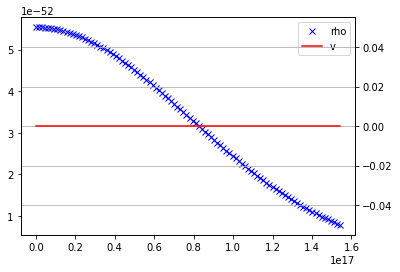

In [128]:
mass = 3
N = 100

Rmin=1.0
Rmax=0.1/2 * parsec_to_cm
r = linspace(Rmin,Rmax,N)
dr = (Rmax - Rmin)/(N)

tff = free_fall(mass, Rmax)
t = linspace(0,tff,N)
dt = tff / (N)

gauss_profile = gauss(arange(N),(N)/2)
rho_m1D = mass / mass_in_sphere(gauss_profile,r,dr)

rho = empty([N,N])
v = empty([N,N])
rho[0] = rho_m1D * gauss_profile

v[0] = zeros(N)

x = linspace(0,100,N)

plot(r,rho[0],v[0],"rho","v")

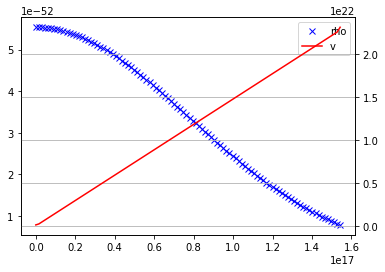

In [129]:
rho[1], v[1] = next(rho[0],v[0],dr,dt)
plot(r,rho[1], v[1],"rho","v")

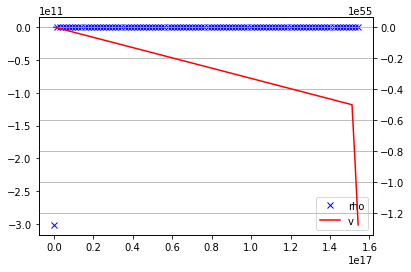

In [130]:
rho[2], v[2] = next(rho[1],v[1],dr,dt)
plot(r,rho[2], v[2],"rho","v")